## Observations and Insights 

In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouseMetadata_path = "resources/mouse_data.csv"
studyResults_path = "resources/study_results.csv"

# Read the mouse data and the study results
mouseMetadata = pd.read_csv(mouseMetadata_path)
studyResults = pd.read_csv(studyResults_path)

# Combine the data into a single dataset
mouseStudy_df = pd.merge(mouseMetadata, studyResults, how="left", on="Mouse ID")

# Display the data table for preview
mouseStudy_df.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2


In [14]:
# Checking the number of mice.
mouseCount = len(mouseStudy_df["Mouse ID"].value_counts())
mouseCount_df = pd.DataFrame({"Total Number of Mice": mouseCount}, index = [0])
mouseCount_df.head()

,Total Number of Mice
0,249


In [27]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouseStudy_df[mouseStudy_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [28]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanMice = mouseStudy_df[mouseStudy_df['Mouse ID'].isin(duplicates)==False]

#cleanMice = mouseStudy_df.drop_duplicates()
cleanMice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [29]:
# Checking the number of mice in the clean DataFrame.
newMice = len(cleanMice["Mouse ID"].value_counts())
newMice_df = pd.DataFrame({"Total Number of Mice": newMice}, index = [0])
newMice_df.head()

,Total Number of Mice
0,249


## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimenGroup = cleanMice.groupby(["Drug Regimen"])
regimenGroup

regimenMean = regimenGroup["Tumor Volume (mm3)"].mean()
regimenMedian = regimenGroup["Tumor Volume (mm3)"].median()
regimenVariance = regimenGroup["Tumor Volume (mm3)"].var()
regimenStd = regimenGroup["Tumor Volume (mm3)"].std()
regimenSem = regimenGroup["Tumor Volume (mm3)"].sem()

#Creating DF for Data
studySummary_df = pd.DataFrame({"Mean": regimenMean, "Median":regimenMedian, "Variance":regimenVariance, "Standard Deviation": regimenStd, "SEM": regimenSem})
studySummary_df.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [35]:
# Using the aggregation method, produce the same summary statistics in a single line
newSummary = cleanMice.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
newSummary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

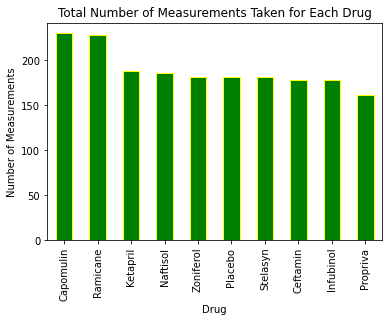

In [86]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drugCount = cleanMice['Drug Regimen'].value_counts()
drugCount.plot(kind="bar", color="green", edgecolor='yellow')
plt.title("Total Number of Measurements Taken for Each Drug")
plt.xlabel("Drug")
plt.ylabel("Number of Measurements")
plt.show()

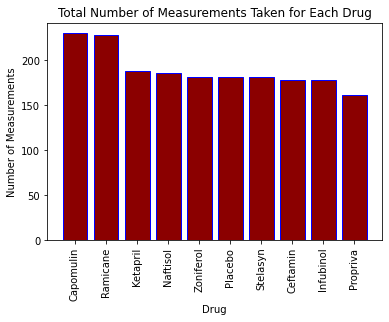

In [84]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drugCounts = cleanMice['Drug Regimen'].value_counts()
plt.bar(drugCounts.index.values,drugCounts.values, color=["darkred"], edgecolor='blue')
plt.title("Total Number of Measurements Taken for Each Drug")
plt.xlabel("Drug")
plt.xticks(rotation=90)
plt.ylabel("Number of Measurements")
plt.show()

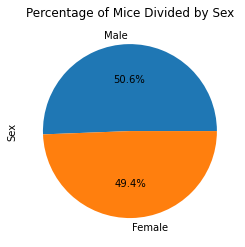

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
drugCounts = cleanMice.Sex.value_counts()
drugCounts.plot(kind="pie",autopct='%1.1f%%')
plt.title("Percentage of Mice Divided by Sex")
plt.show()

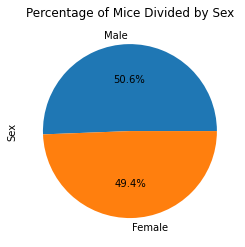

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
drugCounts = cleanMice.Sex.value_counts()
plt.pie(drugCounts.values,labels=drugCounts.index.values,autopct='%1.1f%%')
plt.title("Percentage of Mice Divided by Sex")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
tumorSize = cleanMice.groupby(["Mouse ID"])['Timepoint'].max()
tumorSize = tumorSize.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drugMerge = tumorSize.merge(cleanMice,on=['Mouse ID','Timepoint'],how="left")

In [61]:
# Put treatments into a list for for loop (and later for plot labels)
drugList = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorList = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugList:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    finalVolume = drugMerge.loc[drugMerge["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumorList.append(finalVolume)
    
    # Determine outliers using upper and lower bounds
    quartiles = finalVolume.quantile([.25,.5,.75])
    lowerQ = quartiles[0.25]
    upperQ = quartiles[0.75]
    iqr = upperQ-lowerQ
    lower_bound = lowerQ - (1.5*iqr)
    upper_bound = upperQ + (1.5*iqr)
    outliers = finalVolume.loc[(finalVolume < lower_bound) | (finalVolume > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


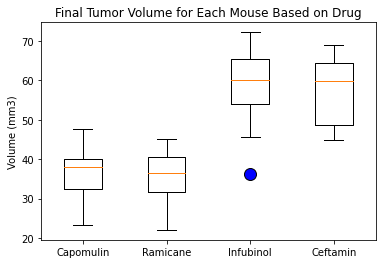

In [66]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumorPlot = dict(markerfacecolor='blue',markersize=12)
plt.title("Final Tumor Volume for Each Mouse Based on Drug")
plt.boxplot(tumorList, labels = drugList,flierprops=tumorPlot)
plt.ylabel('Volume (mm3)')
plt.show()

## Line and Scatter Plots

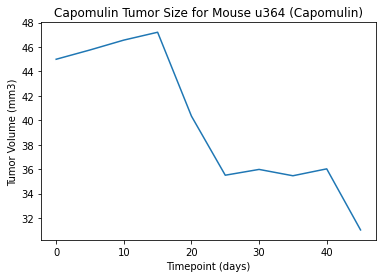

In [70]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulinMouse = cleanMice.loc[cleanMice['Drug Regimen'] == "Capomulin"]
mouseData = capomulinMouse.loc[capomulinMouse['Mouse ID']== 'u364']
plt.plot(mouseData['Timepoint'],mouseData['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Tumor Size for Mouse u364 (Capomulin)')
plt.show()

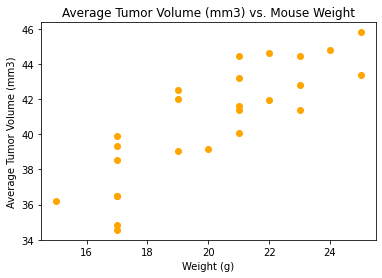

In [87]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulinWeight = cleanMice.loc[cleanMice['Drug Regimen'] == "Capomulin"]
capomulinWeight = capomulinWeight.groupby(['Mouse ID']).mean()
plt.scatter(capomulinWeight['Weight (g)'],capomulinWeight['Tumor Volume (mm3)'], color='orange')
plt.title("Average Tumor Volume (mm3) vs. Mouse Weight")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

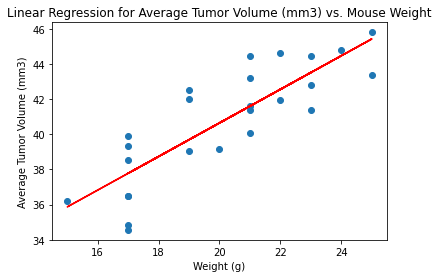

In [75]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capomulinWeight['Weight (g)'],capomulinWeight['Tumor Volume (mm3)'])[0],2)
model = st.linregress(capomulinWeight['Weight (g)'],capomulinWeight['Tumor Volume (mm3)'])

y_values = capomulinWeight['Weight (g)']*model[0]+model[1]
plt.scatter(capomulinWeight['Weight (g)'],capomulinWeight['Tumor Volume (mm3)'])
plt.title("Linear Regression for Average Tumor Volume (mm3) vs. Mouse Weight")
plt.plot(capomulinWeight['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()